# Quick Functionality Guide - Vaccination

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 5)
import sys
sys.path.append('../core/')
import data_download as dd
import data_plot as dp
import data_parser as parse
import math
import utilities

The `data_download.verify_update()` function takes care of downloading and maintaining AGES and ECDC data. No unnecessary downloads, and always up-to-date.

The ECDC vaccination data covers all of the EU/EEA. As such, not all countries have the same level of data coverage.

In [2]:
dd.verify_update(provider="ECDC")


Data provided by ECDC.
Database already exists locally. Checking for update...
The database is up-to-date.


Data is wrangled by `data_parser`.

In [3]:
df = parse.setup_vaccination_data(path="../data/europe/data.csv")

The advantage of using ECDC datasets over national ones is the relative simplicity of selecting regions. The `data_parser.vaccine_region()` function takes EU/EEA country codes as an argument, and outputs a tuple:

In [4]:
austria = parse.vaccine_region(df, region="LU")
austria[0].head()

,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator,FirstCumSum,SecondCumSum
YearWeekISO,,,,,,,,,,,,,
2020-12-27,0,0.0,0,0,9750.0,LU,626108,LU,ALL,COM,506569.0,0,0
2021-01-03,1251,0.0,0,0,0.0,LU,626108,LU,ALL,COM,506569.0,1251,0
2021-01-10,455,0.0,0,0,0.0,LU,626108,LU,ALL,COM,506569.0,1706,0
2021-01-17,2053,0.0,0,0,6075.0,LU,626108,LU,ALL,MOD,506569.0,3759,0
2021-01-24,2711,0.0,1244,0,4875.0,LU,626108,LU,ALL,MOD,506569.0,6470,1244


Plotting basic vaccination statistics is relatively straightforward, including a configurable line of best fit.

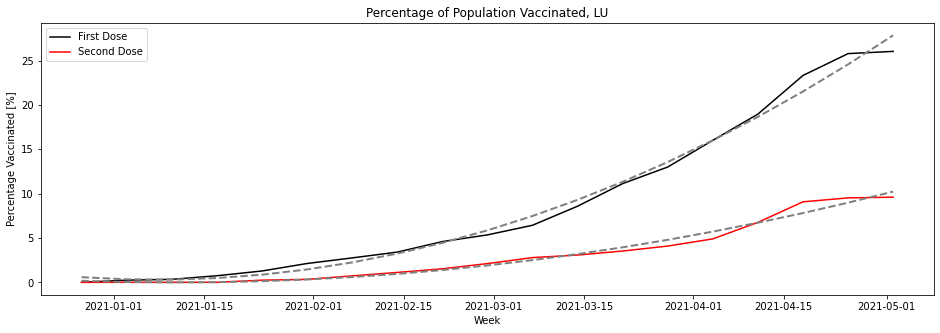

Percentage Vaccinated:
First Dose: 26.031%
Second Dose: 9.597%


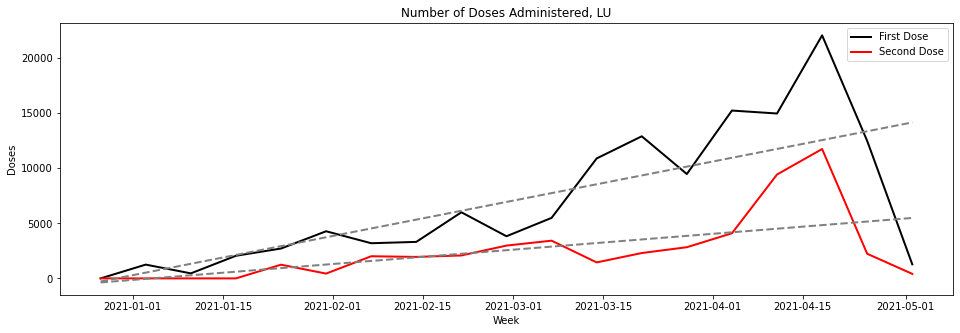

Total doses administered:
First Dose: 131867 people
Second Dose: 48617 people


In [5]:
dp.plot_percentage_vaccinated(austria, poly_degree=2)
dp.plot_doses_administered(austria)

## Estimating vaccination times

Finally, `utilities` offers a very tentative way of estimating when people of a certain age are likely to start receiving their vaccine, based on the vaccination rate of the previous specified number of weeks. These functions will only work if certain age brackets are available for a country's data.

It does not consider demographics within age brackets, does **not** accurately represent a country's vaccination rollout including temporary drops in distribution, and prioritisation based on vulnerability.

**Vaccination rollouts have not been running long enough to reliably estimate vaccination rates.**

For example, to calculate how long a non-vulnerable 30-year-old Austrian might have to wait for their first dose:

In [6]:
vaccination_stats = utilities.vaccine_uptake(df, region="AT", age=30)
days_left = utilities.time_to_vaccination(vaccination_stats, num_weeks=5)

At the current rate of 27385 vaccinations per day, 
there are possibly 193 days left before an available vaccination.
